

Before starting, read the README.txt file.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Part 1: Simple Linear Regression  (30 points)

### Background

Remember from the course material: In Linear Regression, we aim to find the line that fits the given data as well as possible. The line formula is:

### <center> $ \hat{y} = f(x) = \beta_0 + \beta_1 x $ <center> 

And using linear regression, the goal is to find the $\beta_0$ and $\beta_1$ such that the the Mean Squared Error (MSE) is minimized:
    
### <center> $ MSE \Rightarrow \mathcal{L} = \dfrac{1}{N} \sum_{i=1}^{N} (y_i - f(x_i ))^2 $ <center> 
    
As the MSE error gets smaller, the line starts to represent the data better and better.
    
Consider $\beta = (\beta_0 + \beta_1)$. In order to find the $\beta$ that minimizes the MSE loss, we use **Gradient Descent**. Iteratively $\beta$ is updated in the opposite direction of the gradient, while the size of the update is controlled with the learning rate $\eta$:
    
### <center> $ \beta \leftarrow \beta-\eta \frac{d \mathcal{L}}{d \beta} $ <center> 

### Your Task

In this part, you are going to code up Simple Linear Regression on the data given in **data1.csv**, and find the line that fits the data best. To do so, you'll need to complete the following:

- Code up the gradient descent, and print the loss value at every time step. You can use the number of steps as the stopping criteria (e.g. stopping gradient descent after 10 steps). 
- At the end of the algorithm, plot the obtained regression line with the data .
    
I recommend you to use the given learning rate and number of iterations in the code , but you are free to change them to make your algorithm faster if you'd like. You are not allowed to use any libraries other than the imported ones at the beginning. You can initialize the $\beta$ randomly.

In [2]:
def load_data():
    df = pd.read_csv("data1.csv")
    x = df['x'].values
    y = df['y'].values
    return x, y


def gradient_descent(x, y, learning_rate = 0.1, max_its = 500):
    #TO DO: Initialize the beta values
    #the beta values are initialized randomly using np.random.rand()
    np.random.seed(0)  #reproducibility
    beta0 = np.random.rand()
    beta1 = np.random.rand()

    # start gradient descent loop
    for k in range(0,max_its):
        # TO DO: calculate derivative (grad)
        y_pred=beta0 +beta1 *x
        grad_beta0=-2*np.mean(y-y_pred)
        grad_beta1=-2*np.mean((y-y_pred)*x)
        
        
        # TO DO: take gradient descent step
        beta0-=learning_rate*grad_beta0
        beta1-=learning_rate*grad_beta1
        
        # TO DO: calculate and print the loss value
        loss=np.mean((y-y_pred)**2)
        print(f"Iteration{k+1},Loss:{loss}")

    return beta0, beta1

Iteration1,Loss:0.7167055802915673
Iteration2,Loss:0.41846948808596635
Iteration3,Loss:0.24518962275838962
Iteration4,Loss:0.1444986511126814
Iteration5,Loss:0.08597594743360347
Iteration6,Loss:0.05194990538777049
Iteration7,Loss:0.03215492703287091
Iteration8,Loss:0.02062762475572789
Iteration9,Loss:0.01390380000705537
Iteration10,Loss:0.009971053737566434
Iteration11,Loss:0.007660349365912794
Iteration12,Loss:0.006292566802384889
Iteration13,Loss:0.0054731828276422785
Iteration14,Loss:0.004972999262489691
Iteration15,Loss:0.0046588569916854025
Iteration16,Loss:0.004453387172581977
Iteration17,Loss:0.004311630378201006
Iteration18,Loss:0.004207454459323151
Iteration19,Loss:0.004125664561504849
Iteration20,Loss:0.004057419760914367
Iteration21,Loss:0.003997570541873436
Iteration22,Loss:0.003943112107029445
Iteration23,Loss:0.003892285883907439
Iteration24,Loss:0.0038440575741773906
Iteration25,Loss:0.003797813939832885
Iteration26,Loss:0.0037531866556152786
Iteration27,Loss:0.003709949

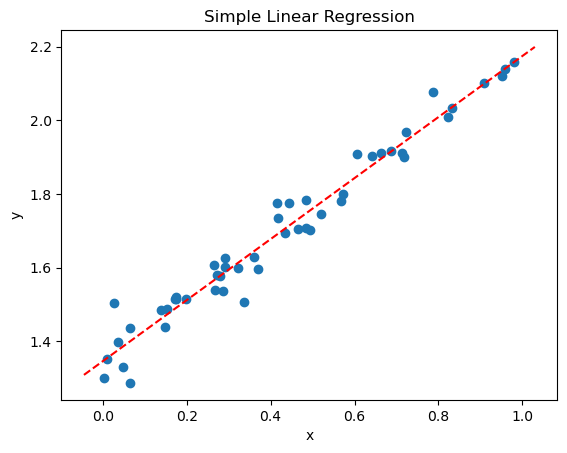

In [3]:
x, y = load_data()
beta0, beta1 = gradient_descent(x, y)
plt.scatter(x, y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = beta0 + beta1 * x_vals
plt.plot(x_vals, y_vals, '--' , color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple Linear Regression')
plt.show()


# Part 2: Multi Linear Regression on California House Pricing Dataset using 5-fold Cross Validation (50 points)

In this part, you are going to train a Multi Linear Regression Model on a real dataset! The dataset we are going to use is **California House Pricing Dataset**. The target is to predict the median house value in California, given the 8 features ( You can examine the name of the features when you run the load_data function given below ). In this part, you will also use Cross-Validation with 5 folds, in addition to everything you implemented in Part 1. You will also alter your code so that it works with multiple attribute. In this case, you will have 8 features and you can code up assuming you will always have 8 features. At the end, you will report your results. 

In summary, you will need to do the following:

- Code up gradient descent with Cross Validation for Multi Linear Regression
- Find the best working learning rate and number of iterations setup.
- Report the MSE loss periodically during training in folds (For example, if you are training for 1000 steps, you can print MSE loss for each 100 steps. If you are training for 100000 steps ( which you can, if you'd like ), you can print MSE loss for each 10000 steps. In total, if you print the loss 10 times periodically for each fold, it's fine ).
- Save the final MSE results on the testing set on each fold in an array. Print the average testing MSE losses at the end of the algorithm. Additionally, print the variance of the testing MSE losses. 

In this part, I am giving you only the load_data function, It is up to you to find the working learning rate and number of iterations setup. In addition to the libraries imported for Part 1, you are allowed to use sklearn for fetching dataset (which is already done for you), and the KFold class for the cross-validation. Other than that, you are not allowed to use sklearn or any other additional libraries.



In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import KFold
import numpy as np
def load_data():
    data= fetch_california_housing()
    print("Features of Boston Housing Prices dataset: ", data.get("feature_names"))
    print("Shape of the X: ", data.data.shape)
    print("Shape of the Y: ", data.target.shape)
    return data.data, data.target



def multiple_gradient_descent_KFold(x, y, learning_rate = 0.0000001, max_its = 100000):
    beta1=None
    beta0=0
    kf=KFold(n_splits=5)
    fold_number=1
    mse_array=[]
    
    for xtrain,xtest in kf.split(x,y):
        print(f'Fold_number {fold_number}')
        X=x[xtrain]
        Y=y[xtrain]
        
        x_test=x[xtest]
        y_test=y[xtest]
        
        n=len(X)#number of samples
        ones=np.ones(len(X)) #creates an array filled with ones with the length of x
        features=np.c_[ones,X] #concatenating ones with x
        testones=np.ones(len(x_test))
        testfeatures=np.c_[testones,x_test]
        
        if fold_number==1:
            beta1=np.zeros(features.shape[1])
            
            
        for i in range(max_its):
            y_predict=np.dot(features, beta1.T) +beta0
            error=y_predict-Y
            dbeta1=(2/n)*np.dot(features.T,error)
            dbeta0=(2/n)*np.sum(error)
            beta1-=learning_rate*dbeta1
            beta0-=learning_rate*dbeta0
            MSE=np.mean(error**2)
            
            if (i%10000==0):
                print(f'{i/10000}: MSE is {MSE}')
                
        fold_number+=1
        y_predict=np.dot(testfeatures,beta1.T) +beta0
        newerror=y_predict-y_test
        
        
        test_MSE=np.mean(newerror**2)
        mse_array.append(test_MSE)
        print(f'Test MSE: {test_MSE}')
        
    finalArray=np.array(mse_array)
    print(f'Average tset MSE {np.mean(finalArray)}')
    print(f'Variance {np.var(finalArray)}')
        
       
    

In [5]:
x,y=load_data()
multiple_gradient_descent_KFold(x,y)

Features of Boston Housing Prices dataset:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Shape of the X:  (20640, 8)
Shape of the Y:  (20640,)
Fold_number 1
0.0: MSE is 6.03635504094536
1.0: MSE is 1.3150803884484958
2.0: MSE is 1.3036134976490208
3.0: MSE is 1.2928287793068896
4.0: MSE is 1.282520795543751
5.0: MSE is 1.2725658878729516
6.0: MSE is 1.2628890048499841
7.0: MSE is 1.2534440401664224
8.0: MSE is 1.2442021618653931
9.0: MSE is 1.2351448742648985
Test MSE: 1.2469347518969272
Fold_number 2
0.0: MSE is 1.2668962365472929
1.0: MSE is 1.238010474007397
2.0: MSE is 1.2283121341542582
3.0: MSE is 1.2187870536780103
4.0: MSE is 1.2094307803546562
5.0: MSE is 1.2002393556275597
6.0: MSE is 1.1912091380940293
7.0: MSE is 1.1823367007704946
8.0: MSE is 1.173618770973603
9.0: MSE is 1.165052194827077
Test MSE: 1.0256944291261043
Fold_number 3
0.0: MSE is 1.0824121391726447
1.0: MSE is 1.072591636805883
2.0: MSE is 1.06597408377155